In [108]:
import pandas as pd
import numpy as np
import math

In [3]:
data = pd.read_csv('./datasets/ACCIDENTS_GU_BCN_2013.csv', encoding='unicode_escape')

In [4]:
data.head()

,Número d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia de setmana,...,Hora de dia,Descripció torn,Descripció causa vianant,Número de morts,Número de lesionats lleus,Número de lesionats greus,Número de víctimes,Número de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X)
0,2013S007360,-1,Desconegut,-1--1--1,Desconegut,-1,Desconegut,Desconegut,Dimecres,3,...,21,Tarda,Desconegut,0,1,0,1,2,-1,-1
1,2013S007723,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,152600,Guinardó,0028 0032,Dimarts,2,...,21,Tarda,Desconegut,0,1,0,1,2,"4585218,67","431621,41"
2,2013S005373,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,134801,Freser,0053 0053,Dimarts,2,...,10,Matí,Creuar per fora pas de vianants,0,1,0,1,1,"4585049,89","431605,09"
3,2013S001486,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161407,Indústria,0224 0224,Dimarts,2,...,10,Matí,Altres,0,1,0,1,1,"4584836,20","431302,26"
4,2013S008254,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161101,Independència,0357 0357,Dilluns,1,...,16,Tarda,Desconegut,0,1,0,1,2,"4584704,26","431385,76"


In [5]:
data['Date'] = '2013' + '-' + data[u'Dia de mes'].apply(lambda x: str(x)) + '-' + data[u'Mes de any'].apply(lambda x: str(x)) 
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
accidents = data.groupby(['Date']).size()
accidents

Date
2013-01-01    16
2013-01-02    18
2013-01-03    17
2013-01-04    29
2013-01-05    17
              ..
2013-12-27    21
2013-12-28    12
2013-12-29    13
2013-12-30    26
2013-12-31    19
Length: 365, dtype: int64

In [6]:
accidents.mean()

25.90958904109589

In [7]:
df = accidents.to_frame()

In [101]:
N_test = 10000
elements = 200
means = [0] * N_test
for i in range(N_test):
    rows = np.random.choice(df.index.values, elements) # a random array of 200 dates
    sampled_df = df.loc[rows]
    means[i] = sampled_df.mean()[0]

(array([  1.,   4.,   2.,   3.,   4.,  17.,  21.,  27.,  33.,  69.,  70.,
         99., 146., 185., 221., 271., 319., 347., 412., 473., 521., 521.,
        571., 551., 607., 541., 516., 510., 499., 490., 382., 345., 283.,
        230., 201., 153., 100.,  71.,  48.,  44.,  36.,  19.,  11.,   6.,
          6.,   8.,   2.,   2.,   0.,   2.]),
 array([23.615, 23.71 , 23.805, 23.9  , 23.995, 24.09 , 24.185, 24.28 ,
        24.375, 24.47 , 24.565, 24.66 , 24.755, 24.85 , 24.945, 25.04 ,
        25.135, 25.23 , 25.325, 25.42 , 25.515, 25.61 , 25.705, 25.8  ,
        25.895, 25.99 , 26.085, 26.18 , 26.275, 26.37 , 26.465, 26.56 ,
        26.655, 26.75 , 26.845, 26.94 , 27.035, 27.13 , 27.225, 27.32 ,
        27.415, 27.51 , 27.605, 27.7  , 27.795, 27.89 , 27.985, 28.08 ,
        28.175, 28.27 , 28.365]),
 <BarContainer object of 50 artists>)

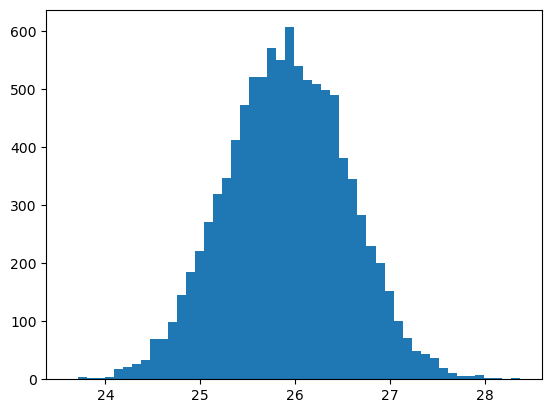

In [102]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

plt.hist(means, 50)

In [103]:
np.array(means).mean()

25.906523999999997

Here you can see that the sample mean is 25.906, very close to the population mean of 25.90958. We derived this from extracting 10k samples of 200 elements each, and calculating their various means. 

This is defined as the sampling distribution. It plays an important role in understanding the real meaning of propositions concerning point estimates. 

### Approximating this very important metric: sample standard deviation 

Basically, when you collect a sample, you want to be able to have a measure of confidence how much it'll deviate from the population mean. 

It can be mathematically shown that given n independent observations of a population with SD $\mu$, the SD of the *sample* can be approximated by this formula: SE = $\mu$/n**0.5

This is demonstrated by the CLT paper by Laplace. Let's just let this sit for a moment. 

This essentially means that you *can* get very close to the truth (population) just by having samples with large enough N sizes. What is N? > 30, and if population distribution is not skewed. 

### Implication is that it allows us to estimate the standard error of sample mean even if we not have access to population



In [182]:

rows = np.random.choice(df.index.values , 200)
sampled_df = df.loc[rows] # we take a random sample of 200 days
est_sigma_mean = sampled_df.std() / math.sqrt(200) # we calculate the SD of sample mean

print("Sample mean of accidents: ", sampled_df.mean()[0])
print("Direct estimation of SE from one sample of 200 elements: ", est_sigma_mean[0])
print("Estimation of SE by simulating 10k samples of 200 elements: ", np.array(means).std())
print("Population mean: ", accidents.mean())

Sample mean of accidents:  26.875
Direct estimation of SE from one sample of 200 elements:  0.6042536615008517
Estimation of SE by simulating 10k samples of 200 elements:  0.641941514021332
Population mean:  25.90958904109589


What is the difference between standard error and population SD? How is standard error used ?

Just like SD, SE also measures variability. SD measures variability within a simple sample (in this case, the population SD), while SE describes variability across multiple samples of a population. 

In particular, it measures the accuracy with which a sample mean estimates the population mean. It indicates the dispersion of the sample mean around the true population mean. 

As sample size increase, SE decreases, meaning larger samples provide more accurate estimates of population mean. 

In this case, **given that the sample mean of accidents is 26.045, and the standard error is 0.64, it suggests that if you repeatedly take samples of same size from the population and calculate the sample means, those sample means will typically be +-0.64 units from the true population mean**. 

If you click refresh in the previous cell, it works out!

### Bootstap method


In [255]:
# len(accidents)
sample = [accidents[j] for j in np.random.randint(len(accidents),size=len(accidents)) ]

sample

[22,
 28,
 16,
 12,
 17,
 28,
 11,
 15,
 35,
 21,
 41,
 27,
 23,
 12,
 23,
 17,
 36,
 13,
 17,
 29,
 25,
 11,
 16,
 26,
 17,
 30,
 44,
 21,
 20,
 30,
 30,
 14,
 26,
 21,
 26,
 26,
 23,
 31,
 12,
 18,
 35,
 26,
 34,
 23,
 22,
 35,
 18,
 23,
 31,
 20,
 20,
 36,
 36,
 18,
 33,
 11,
 27,
 21,
 26,
 22,
 18,
 46,
 20,
 12,
 33,
 23,
 28,
 36,
 18,
 28,
 15,
 39,
 24,
 39,
 29,
 38,
 23,
 23,
 9,
 24,
 25,
 45,
 24,
 31,
 35,
 31,
 10,
 17,
 41,
 14,
 38,
 18,
 11,
 28,
 26,
 16,
 30,
 23,
 21,
 18,
 27,
 26,
 29,
 36,
 26,
 11,
 27,
 18,
 31,
 9,
 19,
 17,
 35,
 28,
 32,
 35,
 30,
 32,
 32,
 27,
 20,
 10,
 24,
 26,
 14,
 17,
 30,
 40,
 27,
 37,
 11,
 30,
 24,
 23,
 16,
 27,
 32,
 39,
 27,
 33,
 30,
 27,
 29,
 28,
 26,
 26,
 25,
 22,
 28,
 23,
 30,
 11,
 10,
 21,
 37,
 20,
 35,
 37,
 41,
 38,
 10,
 28,
 11,
 43,
 30,
 9,
 11,
 18,
 22,
 26,
 31,
 30,
 31,
 16,
 11,
 34,
 36,
 32,
 26,
 27,
 33,
 32,
 29,
 35,
 28,
 15,
 17,
 22,
 28,
 30,
 29,
 17,
 35,
 24,
 46,
 29,
 23,
 27,
 27,
 16,
 41

In [230]:
def meanBootstrap(X, numberb): 
    x = [0]* numberb
    for i in range(numberb): 
        sample = [X[j] for j in np.random.randint(len(X), size=len(X)) ]
        x[i] = np.mean(sample) 
    return x
m= meanBootstrap(accidents , 10000) 
print("Mean estimate:", np.mean(m))

Mean estimate: 25.90562684931507


The key difference between the traditional approach of sampling and the 'bootstrap' approach is that for the former, the samples are drawn at random from each batch (200), and they're not duplicated. 

In the latter, the samples are drawn by assigning 365 random numbers, some of them might contain duplicates. It's like saying, draw a random number out of 365 for 365 times, and we use that as the index for the sample. This sample is done 'with replacement'. We get an approximation after doing it a large number of times. 

The general idea is: from a set of observations, we construct a sample mean, and then we repeat that for 10k times. 

### What I am curious about is what if we only sample a small number of days - i.e. the least cost experiment - what's the point at which we still find the solution a *good* approximation of the population mean? 



In [297]:
N_test = 10000
elements = 45
means = [0] * N_test
for i in range(N_test):
    rows = np.random.choice(df.index.values, elements) # a random array of 200 dates
    sampled_df = df.loc[rows]
    means[i] = sampled_df.mean()[0]

Here you can see the means are already way off. Note, pop mean is 25, but the values i see here range from 17 to 34. 

What if we repeat it many times?


In [298]:
print("mean: ", np.mean(means))
print("SE: ", np.std(means)/math.sqrt(N_test))

mean:  25.903679999999998
SE:  0.0136187539116352


**Turns out it's still not a bad approximation!**

In this context, what we're saying is: we only sample 4 days in a year, but we repeat this experiment 10k times. Total sampled is 40k, and it's still quite an accurate reading. 